## Imports

In [ ]:
!ls /kaggle/input/drowsiness-detection

In [9]:
import cv2, os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import models, layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import ResNet50
from keras.applications.resnet import preprocess_input
from keras.models import Sequential
from keras.layers import Dense


In [17]:
data_dir = 'C:/Users/Kavin/train_CNN'
data_dir

'C:/Users/Kavin/train_CNN'

- We do not explicitly label the images 
-  ImageGenerator will read images from subdirectories, and automatically label them from the name of that subdirectory

## Image Data Generator and Data Augmentation

- Things like rotating and flipping the existing images allows you to generate training data that is more varied, and can help the model generalize better 

In [18]:
train_datagen = ImageDataGenerator(validation_split=0.2,
                                   preprocessing_function=preprocess_input) # don't use rescale = 1./255

train_generator = train_datagen.flow_from_directory( data_dir,
                                                     target_size=(224,224),
                                                     batch_size=100,
                                                     shuffle=True,
                                                     class_mode='categorical',
                                                     subset='training')

validation_datagen = ImageDataGenerator(validation_split=0.2,
                                        preprocessing_function=preprocess_input)

validation_generator =  validation_datagen.flow_from_directory( data_dir,
                                                                target_size=(224,224),
                                                                batch_size=100,
                                                                class_mode='categorical',
                                                                subset='validation')   

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [19]:
model_res50 = Sequential()

model_res50.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet'
    ))

model_res50.add(Dense(2, activation='softmax'))

model_res50.layers[0].trainable = False 

model_res50.summary()


steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_1 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [20]:
model_res50.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model_res50.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    validation_steps=steps_per_epoch_validation,
    epochs=7,
    validation_data=validation_generator,
    verbose=1
)

Epoch 1/7
32/32 [==============================] - 232s 7s/step - loss: 0.1140 - accuracy: 0.9647 - val_loss: 0.0432 - val_accuracy: 0.9950
Epoch 2/7
32/32 [==============================] - 221s 7s/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0499 - val_accuracy: 0.9862
Epoch 3/7
32/32 [==============================] - 216s 7s/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0427 - val_accuracy: 0.9887
Epoch 4/7
32/32 [==============================] - 221s 7s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0395 - val_accuracy: 0.9875
Epoch 5/7
32/32 [==============================] - 220s 7s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 0.9875
Epoch 6/7
32/32 [==============================] - 226s 7s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0364 - val_accuracy: 0.9875
Epoch 7/7
32/32 [==============================] - 207s 7s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0340 - val_accuracy: 0.9875


- Let's see some images 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


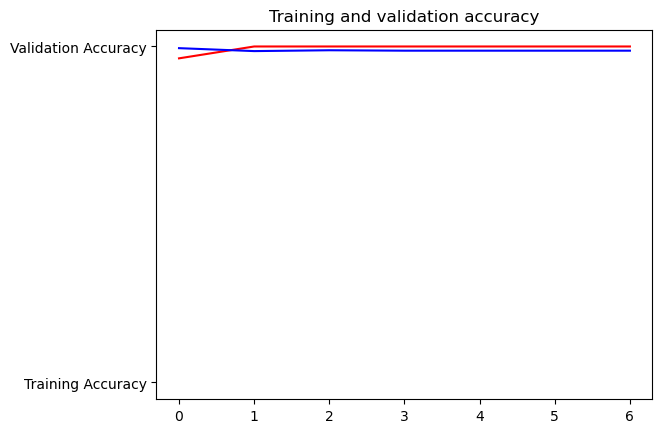

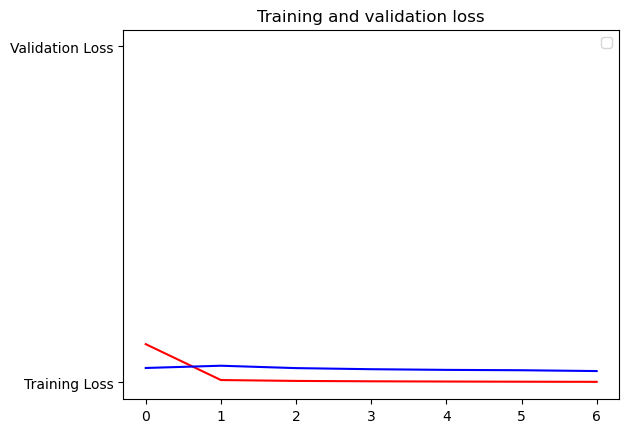

In [21]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
model_res50.save('drowsines_model_1_ResNet50_Binary2.h5')

## Prediction

1/1 [==============================] - 0s 165ms/step
Open eye: 0.9137473106384277
Closed eye: 0.08625268191099167
Eye is OPEN


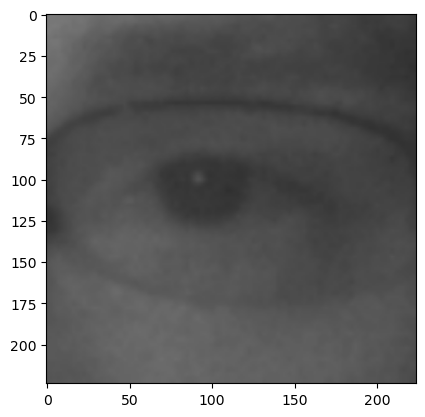

In [32]:
img_array = cv2.imread('C:/Users/Kavin/train_CNN/Open_Eyes/s0001_02593_0_1_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (224, 224))
X_input = np.array(new_array).reshape(1, 224, 224, 3)
plt.imshow(new_array)
prediction = model_res50.predict(X_input/255.0)
openEye = prediction[0][0]
closeEye = prediction[0][1]
print(f"Open eye: {openEye}\nClosed eye: {closeEye}")
if openEye > closeEye:
    print("Eye is OPEN")
else:
    print("Eye is CLOSED")